


##  Logistic Regression Project - Solutions
#### In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

##### This data set contains the following features:

* `'Daily Time Spent on Site'`: consumer time on site in minutes
* `'Age'`: cutomer age in years
* `'Area Income'`: Avg. Income of geographical area of consumer
* `'Daily Internet Usage'`: Avg. minutes a day consumer is on the internet
* `'Ad Topic Line'`: Headline of the advertisement
* `'City'`: City of consumer
* `'Male'`: Whether or not consumer was male
* `'Country'`: Country of consumer
* `'Timestamp'`: Time at which consumer clicked on Ad or closed window
* `'Clicked on Ad'`: 0 or 1 indicated clicking on Ad

#### Importing the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\priya\OneDrive\Desktop\Datasets\advertising.csv')

In [5]:
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

#### EDA

In [7]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

###### In the given dataset the column `'Clicked on Ad'` is the label for the data and the columns `'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country'  'Timestam are the features for the classification of the label`.p'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [10]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [11]:
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

#### Visualizing plots

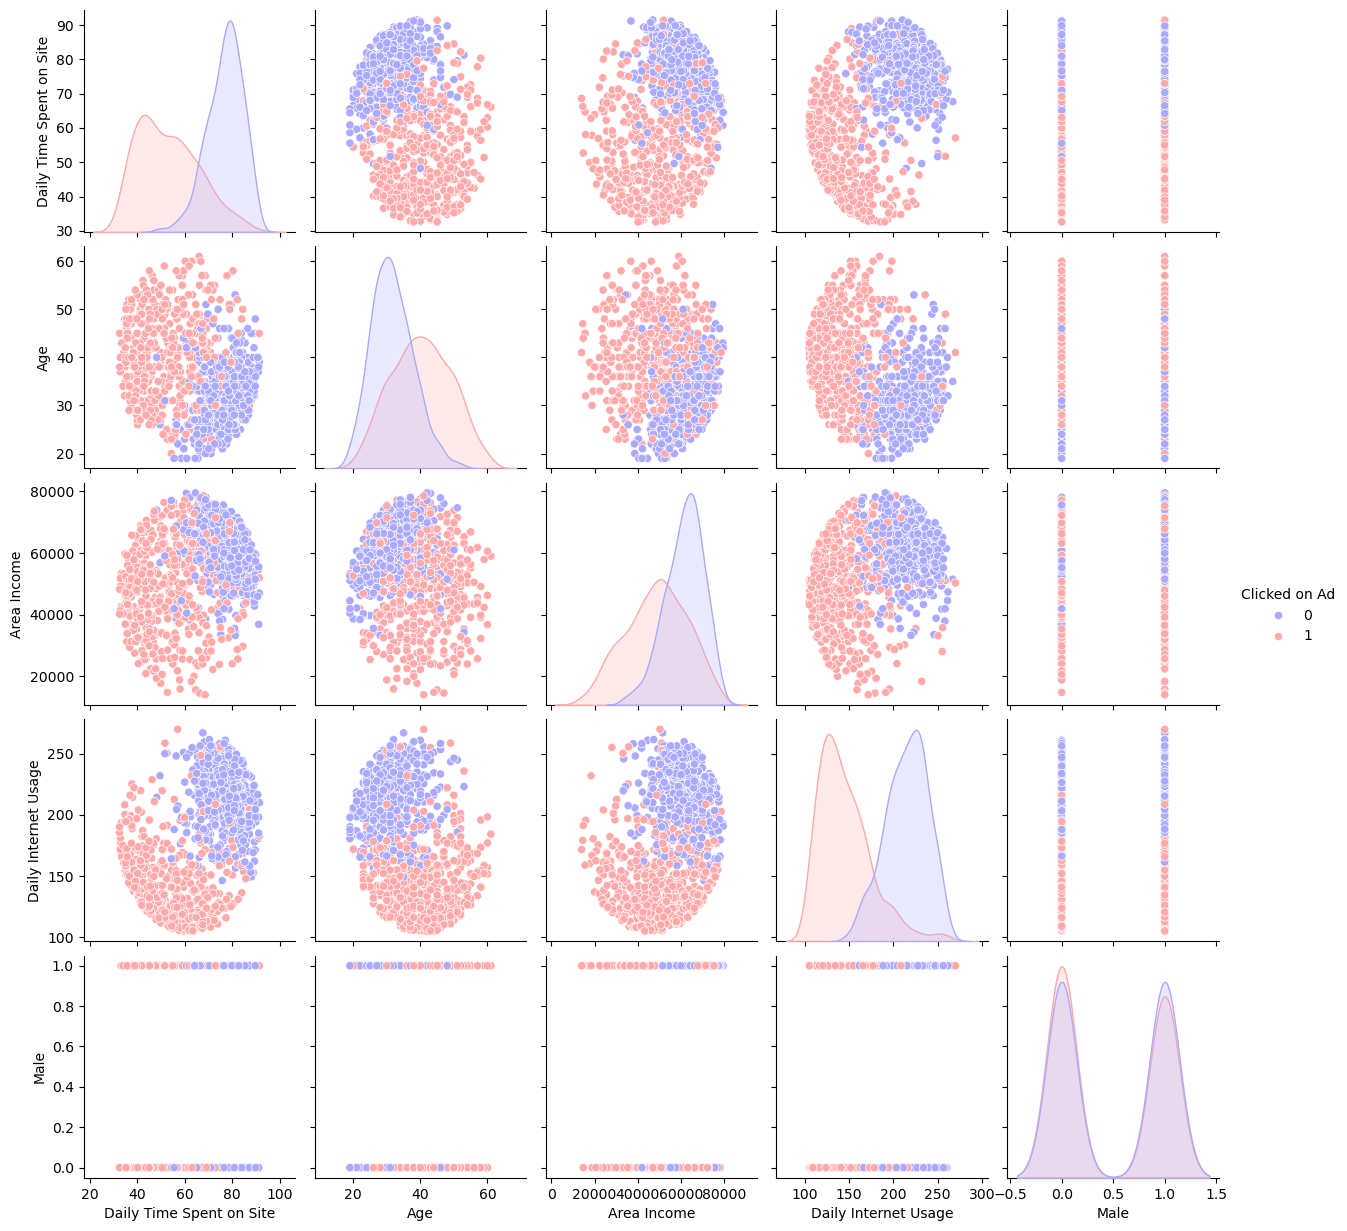

In [13]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')
    

#### Splitting the dataset into features and label followed by the training and testing sets.

In [15]:
# Splitting X ad y from data
X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']

In [16]:
print(X.shape,y.shape)


(1000, 5) (1000,)


#### Scaling the data

In [18]:
X

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=24)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(700, 5) (300, 5) (700,) (300,)


### Logistic Regression

#### Training the model

In [24]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [25]:
model1.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = model1.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], d

In [85]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score, recall_score,roc_auc_score

In [97]:
accuracy = accuracy_score(y_test,y_pred) 
print(f'accuracy {accuracy:.4f}')

accuracy 0.9667


In [29]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       150
           1       0.96      0.97      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[144   6]
 [  4 146]]


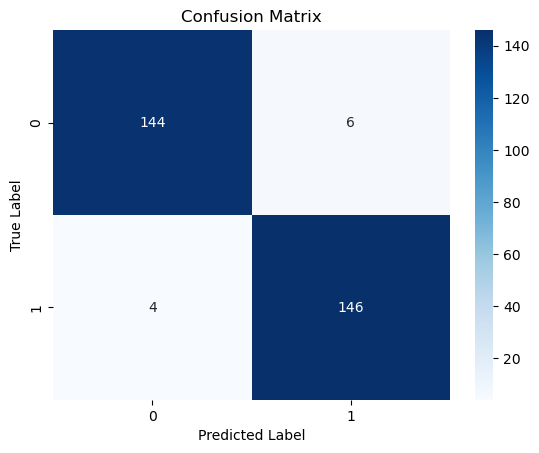

In [31]:
# Plot confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
y_score = model1.predict_proba(X_test)[:,1] 
y_score

array([0.99980438, 0.99906059, 0.98592123, 0.01721822, 0.9997906 ,
       0.07590498, 0.01430226, 0.99488712, 0.00658828, 0.99834198,
       0.01832737, 0.00567543, 0.10770502, 0.83547991, 0.99979255,
       0.00462892, 0.01925115, 0.01892613, 0.99998991, 0.99987451,
       0.30545993, 0.99702085, 0.03537983, 0.05638821, 0.9913904 ,
       0.03549721, 0.99876493, 0.02079041, 0.09144875, 0.99988354,
       0.99795116, 0.99862507, 0.9996908 , 0.99671293, 0.03014059,
       0.00753598, 0.00482462, 0.06839919, 0.00984604, 0.99867883,
       0.99843808, 0.01003017, 0.99997769, 0.00776598, 0.05815662,
       0.9999015 , 0.00633474, 0.02090734, 0.94874121, 0.14032009,
       0.15768001, 0.99579163, 0.99997181, 0.99907966, 0.05992328,
       0.01349927, 0.01124331, 0.99991537, 0.09332456, 0.04101266,
       0.65322648, 0.02039511, 0.99882836, 0.99976324, 0.00609494,
       0.99788935, 0.98024539, 0.99848925, 0.0165705 , 0.02085865,
       0.01173315, 0.01266344, 0.03821829, 0.99701251, 0.99839

In [71]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,y_score)
fpr

array([0.        , 0.        , 0.        , 0.00666667, 0.00666667,
       0.01333333, 0.01333333, 0.02666667, 0.02666667, 0.04      ,
       0.04      , 0.06666667, 0.06666667, 0.43333333, 0.43333333,
       0.61333333, 0.61333333, 1.        ])

In [73]:
tpr

array([0.        , 0.00666667, 0.87333333, 0.87333333, 0.94666667,
       0.94666667, 0.96      , 0.96      , 0.96666667, 0.96666667,
       0.98      , 0.98      , 0.98666667, 0.98666667, 0.99333333,
       0.99333333, 1.        , 1.        ])

In [75]:
thresholds

array([       inf, 0.99999359, 0.95853547, 0.95454677, 0.83547991,
       0.78238487, 0.67905844, 0.67321441, 0.65322648, 0.54160347,
       0.45796353, 0.35500637, 0.32786664, 0.02116749, 0.02090734,
       0.0136957 , 0.01361327, 0.00460675])

In [87]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.9605


In [89]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9733


In [93]:
roc_auc = roc_auc_score(y_test, y_score)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9912


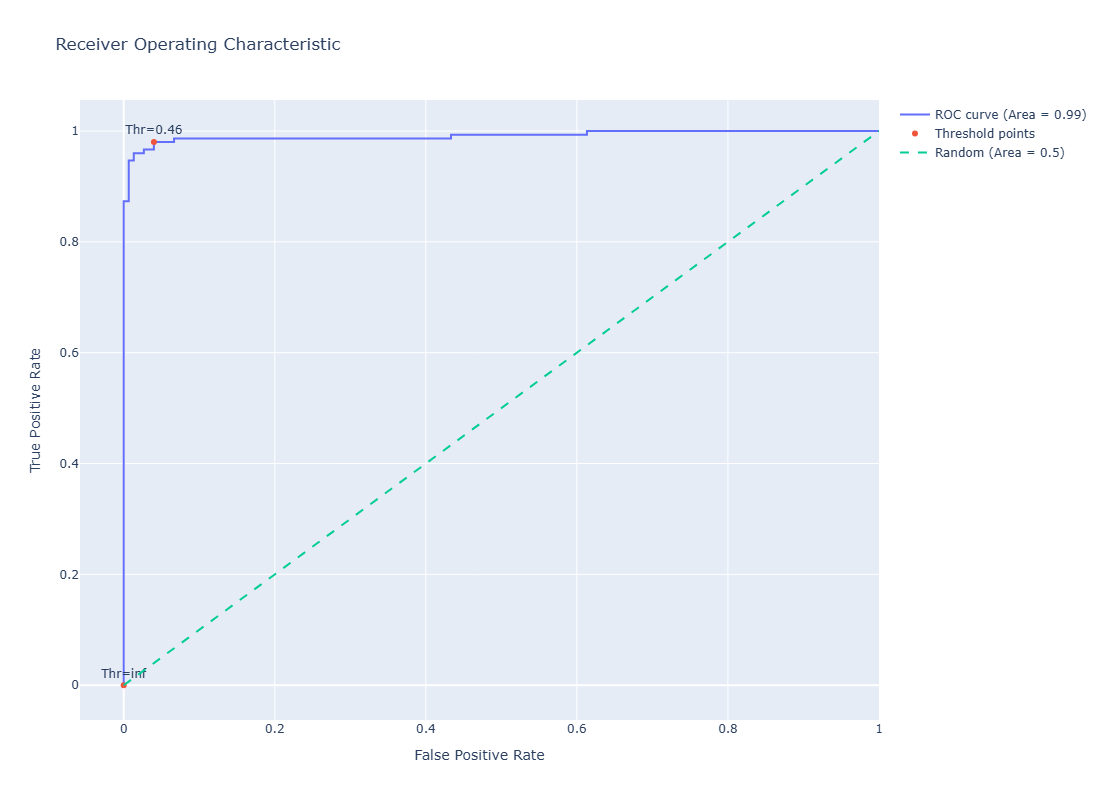

In [77]:
import plotly.graph_objects as go
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming fpr, tpr, thresholds are already calculated as before
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_score)

# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'ROC curve (Area = {roc_auc:.2f})'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


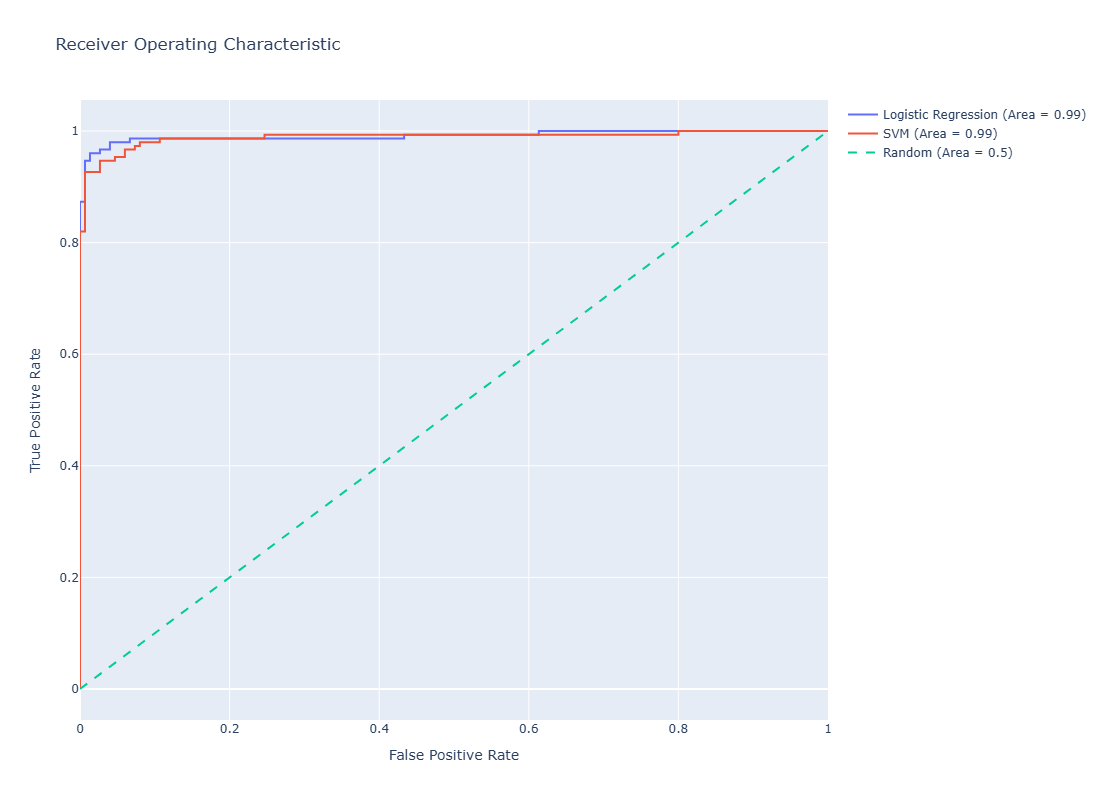

In [81]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Assuming that X_train, X_test, y_train, y_test are already defined

# SVM requires feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_scores = lr_model.predict_proba(X_test)[:,1]

# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_scores = svm_model.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_scores)
svm_auc = roc_auc_score(y_test, svm_scores)

# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=svm_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'SVM (Area = {svm_auc:.2f})'
)

# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


### Conclusion:
##### The Logistic Regression model successfully predicted whether an internet user would click on an advertisement with high accuracy and balanced performance across both classes. The key findings are:

**Model Performance**: The Logistic Regression model developed for predicting user ad clicks performed exceptionally well on the test data. The model achieved an accuracy of 96.67%, indicating that it correctly classified the majority of instances. The precision of 96.05% shows that the model is highly reliable in predicting actual clicks among those it flagged as likely to click. With a recall of 97.33%, the model successfully identified most of the true positives. The high AUC score of 0.9912 further confirms the model's robustness in distinguishing between users who are likely to click on an ad and those who are not. Overall, the model provides a reliable tool for predicting user engagement with advertisements based on their online behavior and demographic features.